## Data Preparation

In [12]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, Normalizer, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

# RandomState
state = np.random.RandomState(12345)

In [13]:
df = pd.read_csv(r'D:\StudySpace\Nam4_KyI\cap1_ai_feature\data\final_dataset.csv')

Peek into the data:

In [3]:
df.head()

,Weight,Height,BMI,Gender,Age,BMIcase,Exercise Recommendation Plan
0,92.085190,1.760250,29.719488,Female,59,over weight,5
1,61.089124,1.595499,23.997776,Female,25,normal,4
2,82.454037,1.816538,24.987499,Female,50,normal,4
3,101.713306,1.790696,31.720047,Female,62,obese,6
4,99.609527,1.969726,25.673756,Male,57,over weight,5


In [4]:
print(df.isna().sum())

Weight                          0
Height                          0
BMI                             0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Gender                        5000 non-null   object 
 4   Age                           5000 non-null   int64  
 5   BMIcase                       5000 non-null   object 
 6   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 273.6+ KB


## Exploratory data analysis


In [6]:
df.describe()

,Weight,Height,BMI,Age,Exercise Recommendation Plan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,79.760954,1.761265,25.900955,41.956000,4.823400
std,17.359682,0.129611,5.678326,14.030361,1.522589
min,50.002978,1.390171,12.791453,18.000000,1.000000
25%,64.705890,1.703790,21.501848,30.000000,4.000000
50%,79.536451,1.776202,26.314692,42.000000,5.000000
75%,95.102506,1.848437,30.741264,54.000000,6.000000
max,109.998871,1.979633,34.997098,65.000000,7.000000


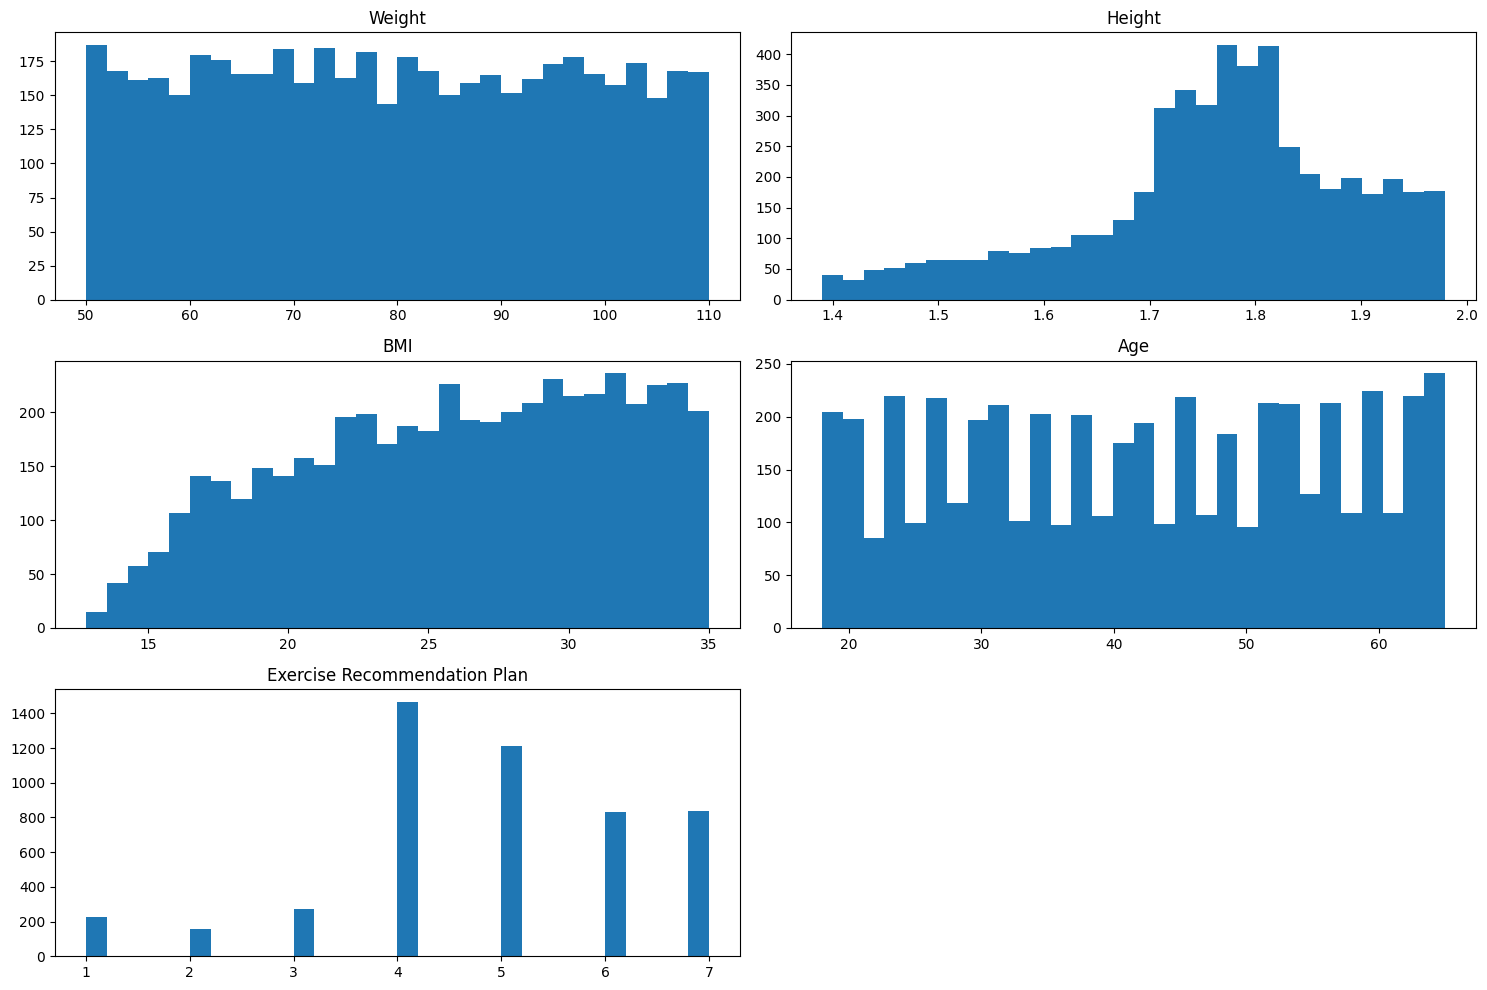

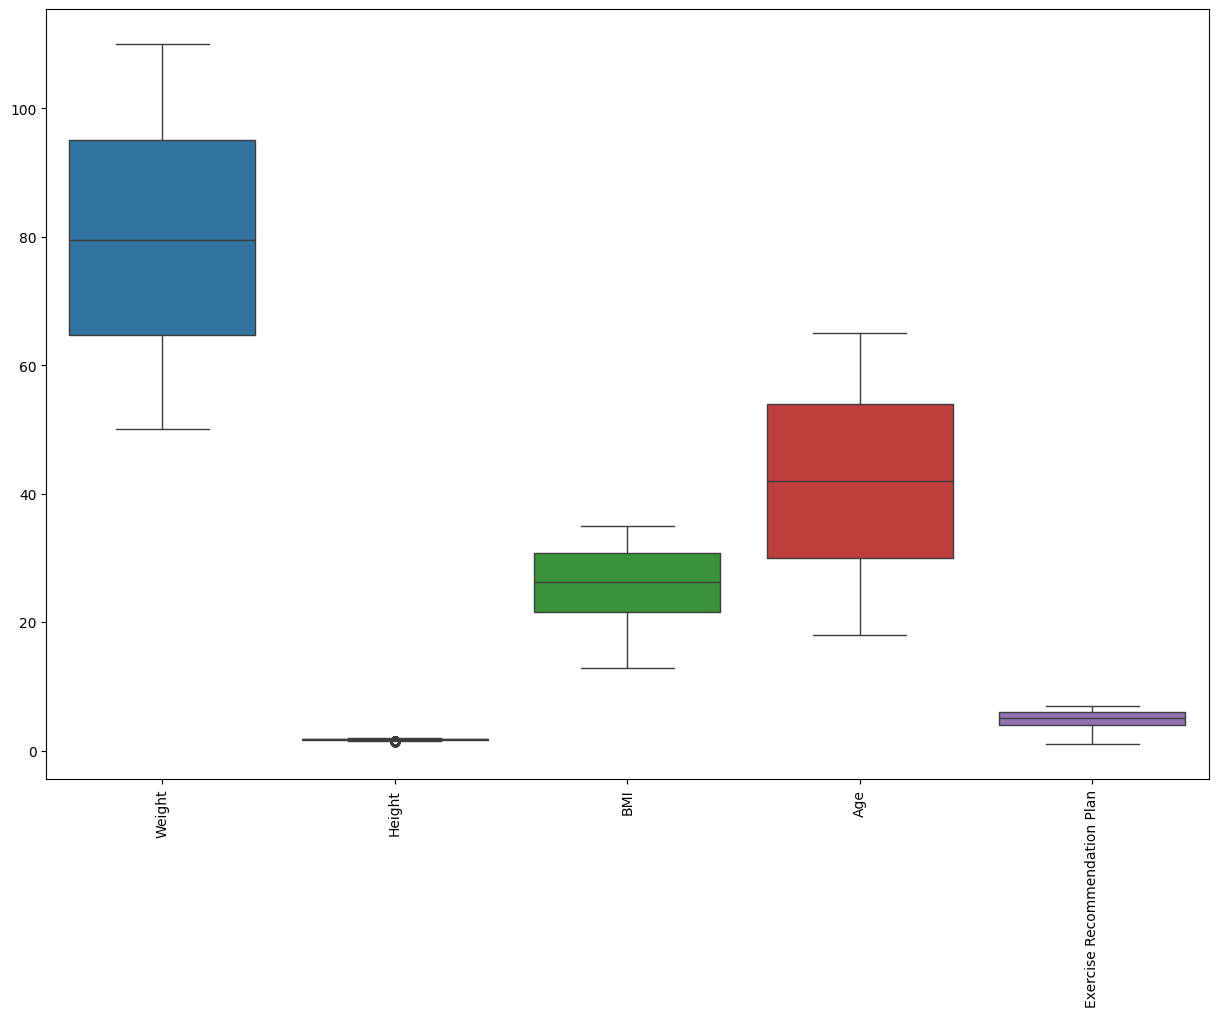

In [7]:
df.hist(bins=30, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Index(['Weight', 'Height', 'BMI', 'Gender', 'Age', 'BMIcase',
       'Exercise Recommendation Plan'],
      dtype='object')


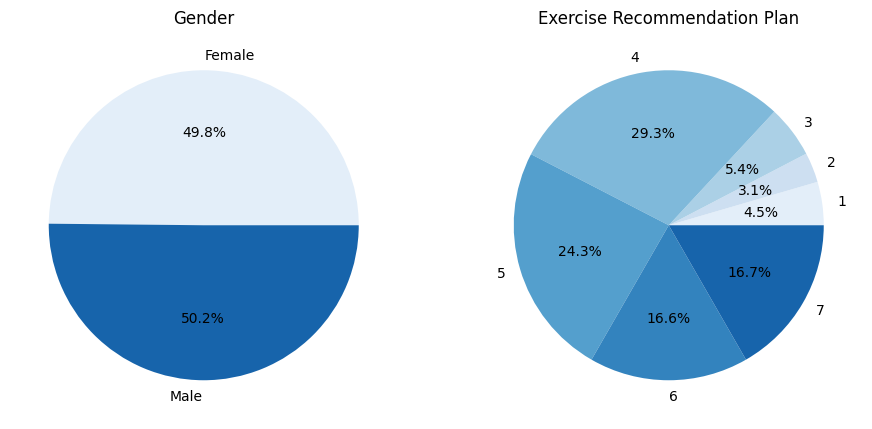

In [8]:
# Check the column names in the dataframe
print(df.columns)

_, axs = plt.subplots(1, 2, figsize=[11,11])
cols = [
    (axs[0], 'Gender'),
    (axs[1], 'Exercise Recommendation Plan'),
]   

cmap = plt.get_cmap('Blues')
for i, (ax, col) in enumerate(cols):
    ax.set(title=col)
    values = df[col].value_counts().sort_index()
    ind = values.index
    colors = list(cmap(np.linspace(0.1, 0.8, len(values))))
    ax.pie(
        values, 
        labels=ind, 
        autopct='%.1f%%', 
        colors=colors
    )
    


C:\Users\ACER\AppData\Local\Temp\ipykernel_12600\2862379173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMIcase', data=df, palette=custom_colors)


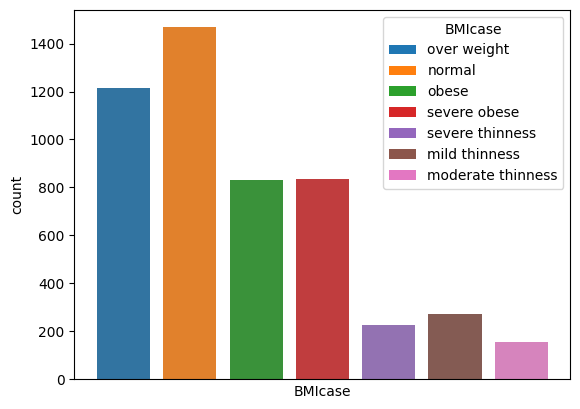

In [9]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
# Map each category to a color in a dictionary
color_map = dict(zip(df['BMIcase'].unique(), custom_colors))

sns.countplot(x='BMIcase', data=df, palette=custom_colors)
plt.xticks([])  # Remove x-axis labels

# Manually add a legend using the color map
for category, color in color_map.items():
    plt.bar(0, 0, color=color, label=category, linewidth=0)
plt.legend(title="BMIcase")

plt.show()

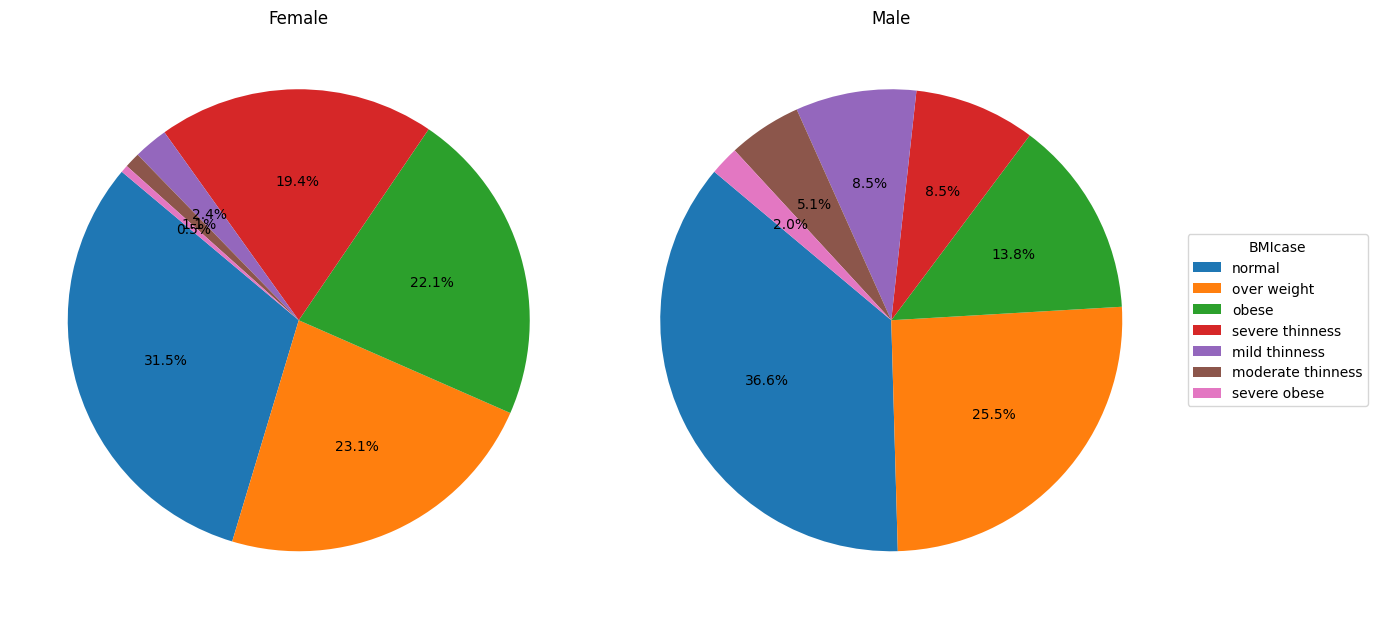

In [10]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Get unique genders in the data
genders = df['Gender'].unique()

# Create a figure with subplots for each gender
fig, axes = plt.subplots(1, len(genders), figsize=(12, 8), subplot_kw={'aspect': 'equal'})

# Loop through each gender and plot a pie chart in each subplot
for i, gender in enumerate(genders):
    # Filter data by gender and get BMIcase counts
    gender_data = df[df['Gender'] == gender]
    bmi_counts = gender_data['BMIcase'].value_counts()
    
    # Plot pie chart in the respective subplot
    wedges, texts, autotexts = axes[i].pie(
        bmi_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=custom_colors
    )
    
    # Set title for each subplot
    axes[i].set_title(f'{gender}')

# Create a single legend for all pie charts outside the subplots
fig.legend(wedges, bmi_counts.index, title="BMIcase", loc="center right", bbox_to_anchor=(1.15, 0.5))

plt.tight_layout()
plt.show()


In [14]:
# BMI range for each BMI case, ordered by min BMI
print(df.groupby('BMIcase')['BMI'].agg(['min', 'max', 'median', 'std']).sort_values('min'))

                         min        max     median       std
BMIcase                                                     
severe thinness    12.791453  15.992804  14.968907  0.823019
moderate thinness  16.004176  16.989870  16.567873  0.294713
mild thinness      17.001572  18.499102  17.723253  0.446058
normal             18.503725  24.994164  22.075742  1.842883
severe obese       21.327515  34.997098  32.096170  2.527037
over weight        25.000689  29.998380  27.450584  1.447621
obese              30.001448  34.990596  32.229154  1.457900
